# How Not To Put A Nation To Sleep
## Blake Whittington and Gabriele Spiridaviciute
***
## How Does Economic Health Affect People's Sleep

### Economic Performance Metrics and the Time Americans Spend Sleeping Dataset
We will be focusing on comparing the TASS dataset with various economic performance metrics.
These include :<br>
• Gross Domestic Product<br>
• Employment Percentage<br>
• Inflation Percentage

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
US_GDP = '../data_file/cleaned_data_pickle/US_GDP.pickle'
US_GDP_df = pd.read_pickle(US_GDP)

US_employment = '../data_file/cleaned_data_pickle/US_employment.pickle'
US_employment_df = pd.read_pickle(US_employment)

US_inflation = '../data_file/cleaned_data_pickle/US_inflation.pickle'
US_inflation_df = pd.read_pickle(US_inflation)

total_03_19 = '../data_file/cleaned_data_pickle/total_df.pickle'
total_03_19_df = pd.read_pickle(total_03_19)

men_03_19 = '../data_file/cleaned_data_pickle/men_df.pickle'
men_03_19_df = pd.read_pickle(men_03_19)

women_03_19 = '../data_file/cleaned_data_pickle/women_df.pickle'
women_03_19_df = pd.read_pickle(women_03_19)



tass_df = pd.read_csv('../data_file/cleaned_data_csv/tass_df.csv')

In [3]:
US_GDP_df = US_GDP_df.rename(columns={'GDP Growth (%)': 'GDP Growth (%)'})
US_GDP_df['GDP Growth (%)'] = US_GDP_df['GDP Growth (%)'].str.rstrip("%").astype(float)
US_GDP_df['Annual Change'] = US_GDP_df['Annual Change'].str.rstrip("%").astype(float)

US_GDP_df = US_GDP_df[US_GDP_df['Year'] > 2002]
US_GDP_df = US_GDP_df[US_GDP_df['Year'] < 2020]
US_employment_df = US_employment_df[US_employment_df['Year'] > 2002]
US_employment_df = US_employment_df[US_employment_df['Year'] < 2020]
US_inflation_df = US_inflation_df[US_inflation_df['Year'] > 2002]
US_inflation_df = US_inflation_df[US_inflation_df['Year'] < 2020]
total_03_19_df = total_03_19_df.rename(columns={'avg_sleep':'Average Sleep'})
US_GDP_df = US_GDP_df.rename(columns={'GDP Growth (%)':'GDP Growth (%)'})

In [4]:
total_03_19_df

,gender,year,Average Sleep
0,total,2003,8.57
1,total,2004,8.55
2,total,2005,8.62
3,total,2006,8.63
4,total,2007,8.57
5,total,2008,8.60
6,total,2009,8.67
7,total,2010,8.67
8,total,2011,8.71
9,total,2012,8.73


In [5]:
US_GDP_df

,Year,GDP Growth (%),Annual Change
1,2019,2.16,-0.84
2,2018,3.00,0.66
3,2017,2.33,0.62
4,2016,1.71,-1.36
5,2015,3.08,0.55
6,2014,2.53,0.68
7,2013,1.84,-0.41
8,2012,2.25,0.70
9,2011,1.55,-1.01
10,2010,2.56,5.10


In [6]:
US_employment_df['Unemployment Rate (%)'] = US_employment_df['Unemployment Rate (%)'].str.rstrip("%").astype(float)/100

In [7]:
US_inflation_df['Inflation Rate (%)'] = US_inflation_df['Inflation Rate (%)'].str.rstrip("%").astype(float)/100

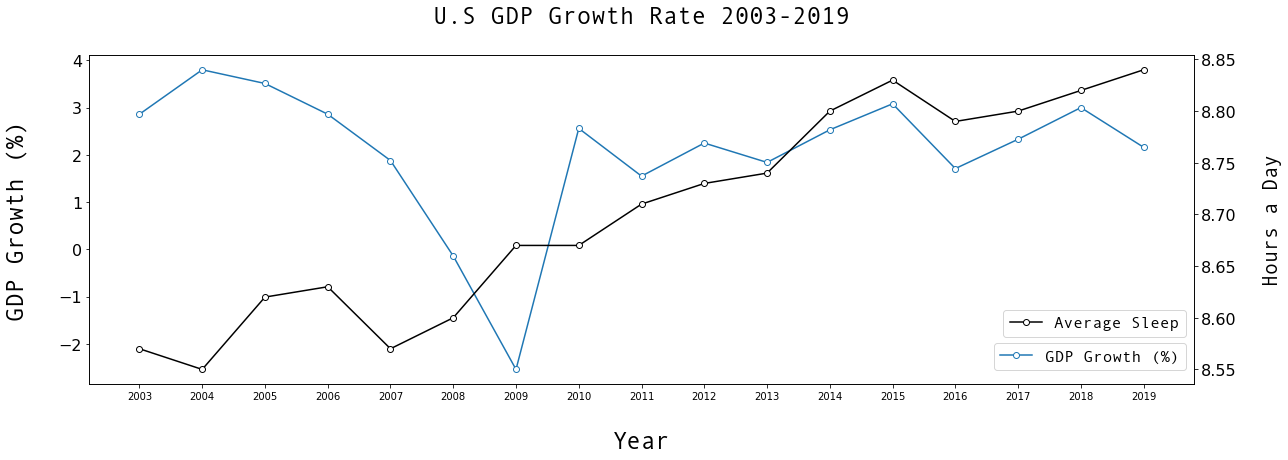

In [8]:
fig, ax = plt.subplots(figsize=(18,6.5))
US_GDP_df.plot(ax=ax,x='Year', y='GDP Growth (%)',marker='o', markerfacecolor='w',legend=None)

bx = ax.twinx()
total_03_19_df.plot(ax=bx,x='year', y='Average Sleep',marker='o', markerfacecolor='w',color = 'black',legend=None)

ax.set_xlabel('\nYear',fontsize = 24,fontfamily = 'Andale Mono')
ax.set_ylabel('GDP Growth (%)\n',fontsize = 24,fontfamily = 'Andale Mono')
ax.set_title('U.S GDP Growth Rate 2003-2019\n',fontsize = 24,fontfamily = 'Andale Mono')

ax.legend(bbox_to_anchor =(1.25, 0.98))
bx.set_ylabel('\nHours a Day',fontsize = 20,fontfamily = 'Andale Mono')

ax.legend(bbox_to_anchor=(1, 0.15),prop={'size': 16,'family':'Andale Mono'})
bx.legend(bbox_to_anchor=(1, 0.25),prop={'size': 16,'family':'Andale Mono'})
    
ax.yaxis.set_tick_params(labelsize=16)
bx.yaxis.set_tick_params(labelsize=16)
    

ax.set_xticks(np.arange(2003,2020,1))

plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/2002_US_GDP_growth.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/2002_US_GDP_growth.jpg', dpi=300)

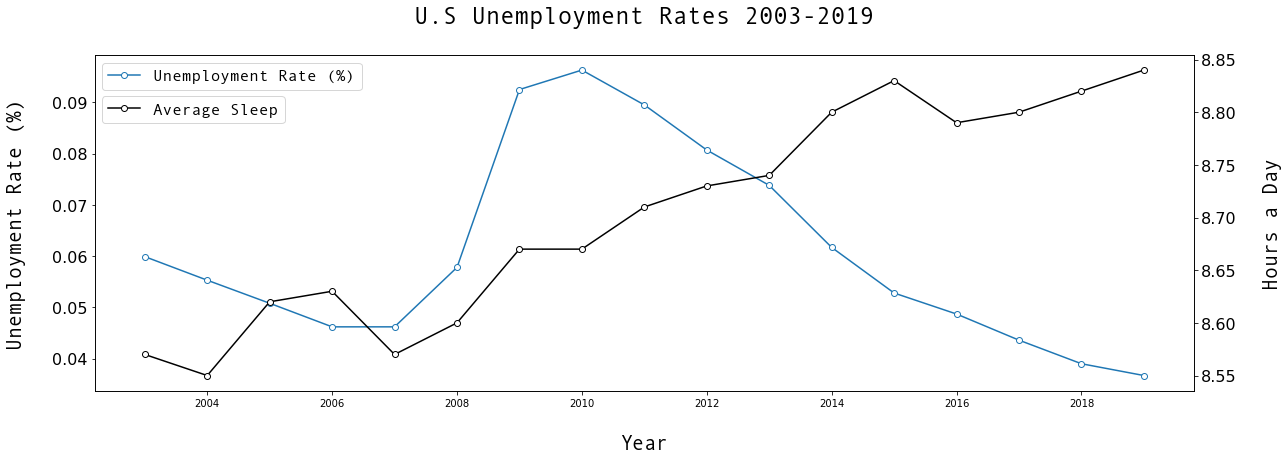

In [9]:
def unemployment_graph(df): 
    fig, ax = plt.subplots(figsize=(18,6.5))
    US_employment_df.plot(ax=ax,x='Year', y='Unemployment Rate (%)',marker='o', markerfacecolor='w',legend=None)

    bx = ax.twinx()
    df.plot(ax=bx,x='year', y='Average Sleep',marker='o', markerfacecolor='w',color = 'black',legend=None)

    ax.set_xlabel('\nYear',fontsize = 20,fontfamily = 'Andale Mono')
    ax.set_ylabel('Unemployment Rate (%)\n',fontsize = 20,fontfamily = 'Andale Mono')
    ax.set_title('U.S Unemployment Rates 2003-2019\n',fontsize = 24,fontfamily = 'Andale Mono')
    ax.legend(bbox_to_anchor =(1.25, 0.98))

    bx.set_ylabel('\nHours a Day',fontsize = 20,fontfamily = 'Andale Mono')

    ax.legend(bbox_to_anchor=(0.25, 1),prop={'size': 16,'family':'Andale Mono'})
    bx.legend(bbox_to_anchor=(0.18, 0.9),prop={'size': 16,'family':'Andale Mono'})
    
    ax.yaxis.set_tick_params(labelsize=16)
    bx.yaxis.set_tick_params(labelsize=16)
    
    plt.tight_layout()

    plt.savefig('../data_file/graphs/PNG/2002_US_Unemployment.png', dpi=300)
    plt.savefig('../data_file/graphs/JPG/2002_US_Unemploymeny.jpg', dpi=300)
    
unemployment_graph(total_03_19_df)


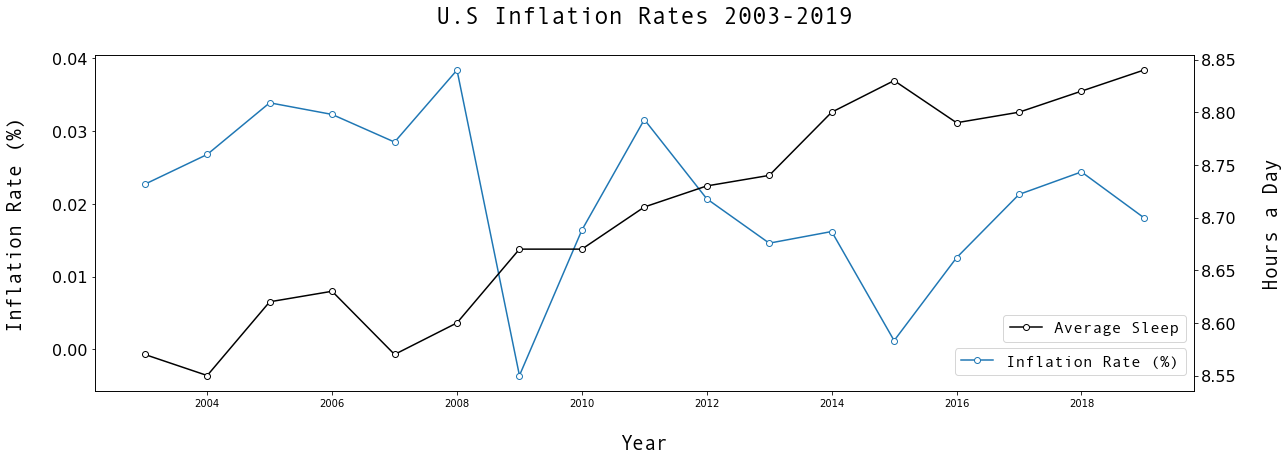

In [10]:
def inflation_graph(df): 
    fig, ax = plt.subplots(figsize=(18,6.5))
    US_inflation_df.plot(ax=ax,x='Year', y='Inflation Rate (%)',marker='o', markerfacecolor='w',legend=None)

    bx = ax.twinx()
    df.plot(ax=bx,x='year', y='Average Sleep',marker='o', markerfacecolor='w',color = 'black',legend=None)

    ax.set_xlabel('\nYear',fontsize = 20,fontfamily = 'Andale Mono')
    ax.set_ylabel('Inflation Rate (%)\n',fontsize = 20,fontfamily = 'Andale Mono')
    ax.set_title('U.S Inflation Rates 2003-2019\n',fontsize = 24,fontfamily = 'Andale Mono')

    bx.set_ylabel('\nHours a Day',fontsize = 20,fontfamily = 'Andale Mono')
    ax.legend(bbox_to_anchor=(1, 0.15),prop={'size': 16,'family':'Andale Mono'})
    bx.legend(bbox_to_anchor=(1, 0.25),prop={'size': 16,'family':'Andale Mono'})
    
    ax.yaxis.set_tick_params(labelsize=16)
    bx.yaxis.set_tick_params(labelsize=16)
    
    plt.tight_layout()

    plt.savefig('../data_file/graphs/PNG/2002_US_Inflation.png', dpi=300)
    plt.savefig('../data_file/graphs/JPG/2002_US_Inflation.jpg', dpi=300)

inflation_graph(total_03_19_df)


## Sleep Correlation

In [11]:
columns = ['Correlation']
corr_df = pd.DataFrame(columns = columns)
corr_df.loc['Inflation Correlation','Correlation'] = total_03_19_df['Average Sleep'].corr(US_inflation_df['Inflation Rate (%)'])
corr_df.loc['Unemployment Correlation','Correlation'] = total_03_19_df['Average Sleep'].corr(US_employment_df['Unemployment Rate (%)'])

corr_df.loc['GDP Correlation','Correlation']  = total_03_19_df['Average Sleep'].corr(US_GDP_df['GDP Growth (%)'])
print(total_03_19_df['Average Sleep'].corr(US_employment_df['Unemployment Rate (%)']))
print(total_03_19_df['Average Sleep'].corr(US_GDP_df['GDP Growth (%)']))
print(total_03_19_df['Average Sleep'].corr(US_inflation_df['Inflation Rate (%)']))

0.31542236778495136
-0.1911623763829077
0.4582411493155373


In [12]:
corr_df.index

r =range(0,len(corr_df.index))

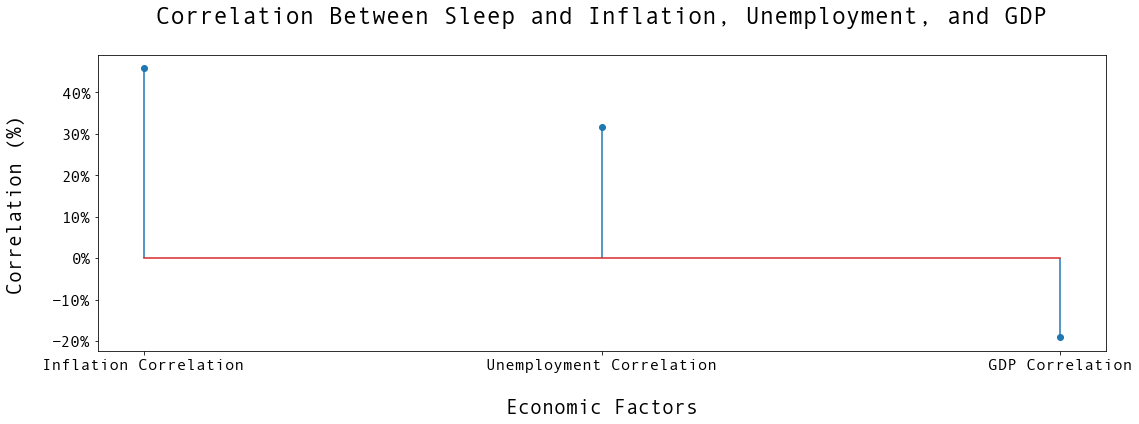

In [13]:
import matplotlib.ticker as mtick
width = .8
fig, ax = plt.subplots(figsize=(16, 6))
plt.title('Correlation Between Sleep and Inflation, Unemployment, and GDP\n',fontsize = 24,fontfamily = 'Andale Mono')
plt.stem(corr_df['Correlation']*100)
plt.xticks(r, corr_df['Correlation'].index, fontsize = 16)
plt.yticks(fontsize = 16,fontfamily = 'Andale Mono')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('\nEconomic Factors',fontsize = 20,fontfamily = 'Andale Mono')
ax.set_ylabel('Correlation (%)\n',fontsize = 20,fontfamily = 'Andale Mono')

plt.xticks(fontname = 'Andale Mono')
plt.yticks(fontname = 'Andale Mono')
ax.yaxis.set_tick_params(labelsize=16)
bx.yaxis.set_tick_params(labelsize=16)

plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/2002_sleep_economic_correlation.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/2002_sleep_economic_correlation.jpg', dpi=300)